In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2

# Load data

In [ ]:
# Load pca-applied data
df = pd.read_csv('../data/heart_disease.csv')
X = df.drop(columns=['num'])
y = df['num']
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,num
0,0.675205,0.344930,1.289485,-0.087400,-0.438102,1.117363,-0.144715,-0.384428,0.385048,-1.030932,-0.052244,0.0
1,3.544619,0.506039,-0.222566,-0.653609,0.713136,-1.170823,0.391445,-0.428654,0.086070,-0.125677,0.053414,2.0
2,2.386927,-1.237065,-0.578411,-0.018786,0.465064,0.576870,-0.705147,-0.060905,0.407639,0.188710,0.092074,1.0
3,-1.344182,-0.262477,1.258423,2.743671,0.313740,1.221851,0.702343,0.226808,-0.184473,-0.386414,-0.377414,0.0
4,-1.755805,-0.296602,0.881092,0.764861,0.245258,0.185786,0.279775,-1.013160,-0.128125,-0.362403,0.480802,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.622619,-1.052430,-0.783222,0.766006,-1.006978,-0.233717,0.353068,0.744016,0.037562,0.076190,0.633262,1.0
299,2.566185,-0.885424,1.080689,-0.090710,1.081507,0.992006,-0.348138,0.386570,-0.328988,0.318557,0.261857,2.0
300,0.905604,-2.366826,0.785159,-1.188388,-0.033922,-0.595107,-0.390816,0.396056,-0.223410,0.394138,0.015781,3.0
301,-0.777244,0.692779,-0.291897,-0.656726,0.792481,0.273470,-0.046283,-0.874889,0.082147,0.511426,0.921933,1.0


# Feature Importance

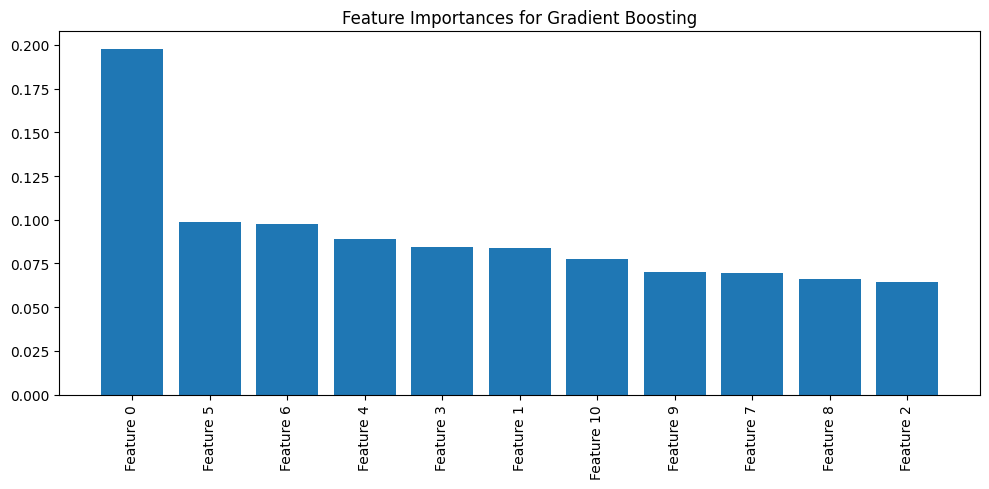

In [36]:
# Initialize and fit the Random Forest model
# This model will be used to determine feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=30)
rf_model.fit(X, y)

# Plot feature importances
feature_importances = rf_model.feature_importances_
indices_rf = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title('Feature Importances for Gradient Boosting')
plt.bar(range(X.shape[1]), feature_importances[indices_rf])
plt.xticks(range(X.shape[1]), [f'Feature {i}' for i in indices_rf], rotation=90)
plt.tight_layout()
plt.show()

# Recursive Feature Elimination (RFE)

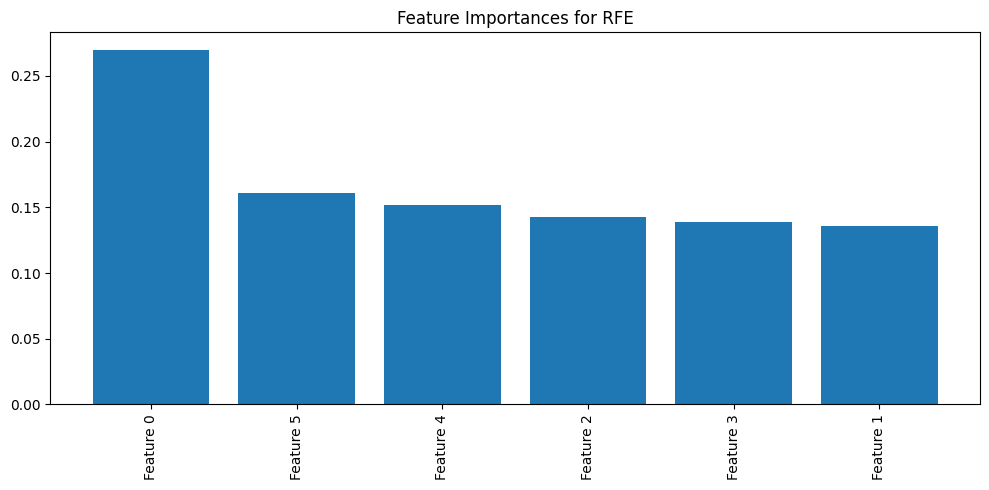

In [35]:
rfe_model = RFE(estimator=rf_model, n_features_to_select=6)
X_selected = rfe_model.fit_transform(X, y)

# Plot RFE feature importances
rfe_importances = rfe_model.estimator_.feature_importances_
indices_rfe = np.argsort(rfe_importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title('Feature Importances for RFE')
plt.bar(range(X_selected.shape[1]), rfe_importances[indices_rfe])
plt.xticks(range(X_selected.shape[1]), [f'Feature {i}' for i in indices_rfe], rotation=90)
plt.tight_layout()
plt.show()

# Chi-Square Test

Note: the chi-square test requires all feature values (X) to be non-negative. Since the features are PCA components, they can have negative values. Therefore, the chi-square test is not appropriate for PCA-transformed data. Instead, it should be applied before PCA.

In [ ]:
# Note: the chi-square test is commented as it is not appropriate for PCA-transformed data


# Selected features from RFE
#selected_features = rfe_model.get_feature_names_out()

# chi2_values, p_values = chi2(X_selected, y)
# chi2_df_selected = pd.DataFrame({
#     'Feature': selected_features,
#     'Chi2 Value': chi2_values,
#     'p-value': p_values
# })
# chi2_df_selected

# Save reduced data

In [40]:
selected_features = rfe_model.get_feature_names_out()
df_reduced = pd.DataFrame(X_selected, columns=selected_features)
df_reduced['num'] = y
df_reduced.to_csv('../data/heart_disease.csv', index=False)